***Pranjal Shikhar Sinha***

# Task 3 - To Explore Unsupervised Mchine Learning

# Problem :

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [5]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode,plot,iplot

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [6]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [7]:
iris=pd.read_csv(r'Iris.csv')

In [8]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
iris.shape

(150, 6)

In [10]:
iris.drop('Id',axis=1,inplace=True)

In [11]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
X=iris.drop(['Species'],axis=1)

In [13]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y=iris['Species']

In [15]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [37]:
iris.rename(columns={'SepalLengthCm':'SepalLength','SepalWidthCm':'SepalWidth','PetalWidthCm':'PetalWidth','PetalLengthCm':'PetalLength'},inplace=True)

In [40]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


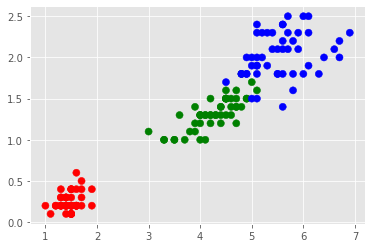

In [41]:
colormap=np.array(['Red','green','blue'])
fig=plt.scatter(iris['PetalLength'],iris['PetalWidth'],c=colormap[y],s=50)

In [42]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [44]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=2,n_jobs=4)
km.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [45]:
centers=km.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [46]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [47]:
Catagory_kmeans=['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']


In [48]:
Catagory_kmeans

['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']

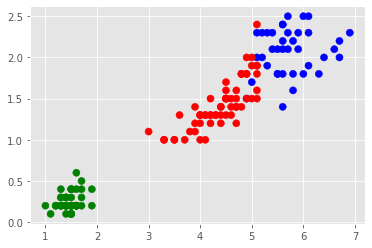

In [49]:
colormap=np.array(['Red','green','blue'])
fig=plt.scatter(iris['PetalLength'],iris['PetalWidth'],c=colormap[km.labels_],s=50)

Text(0.5, 1.0, 'Predicted')

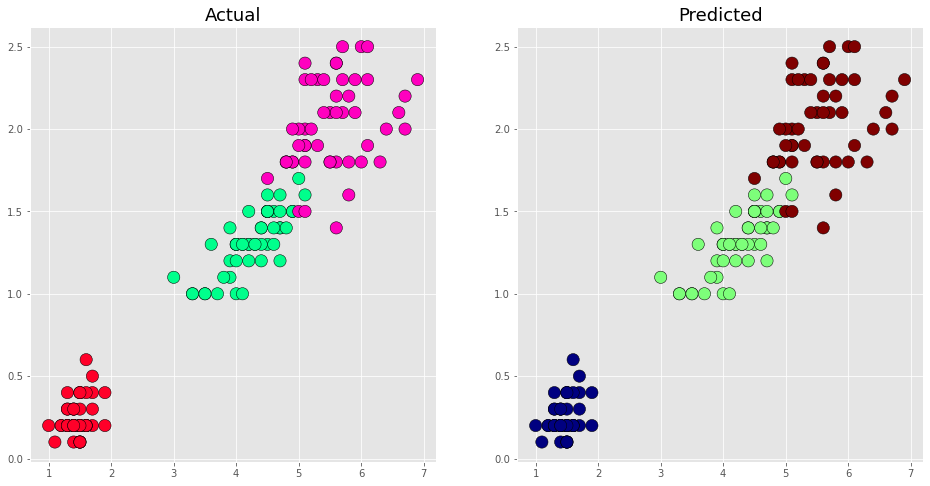

In [50]:
new_labels=km.labels_
fig,axes=plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(X[:,2],X[:,3],c=y,cmap='gist_rainbow',edgecolor='k',s=150)
axes[1].scatter(X[:,2],X[:,3],c=y,cmap='jet',edgecolor='k',s=150)
axes[0].set_title('Actual',fontsize=18)
axes[1].set_title('Predicted',fontsize=18)

In [51]:
#Lets predict on custom input value

In [52]:
X_km=np.array([[1 ,1, 1, 1]])

In [53]:
X_km_prediction=km.predict(X_km)
X_km_prediction[0]
print(Catagory_kmeans[int(X_km_prediction[0])])

Iris-Setosa
